# Flight Price Prediction

**OBJECTIVES**

The objectives in this project is to analyse the flight booking dataset obtained from “Ease My Trip” website and help find valuable insights. Then proceed with making predictions of flight prices for further analysis.

**RESEARCH QUESTIONS** *(RQ)*

The aim of this project is to answer the below research questions:
* Does price vary with Airlines?
* How does the ticket price vary between Economy and Business class?
* How is the price affected when tickets are bought in just 1 or 2 days before departure?
* Does ticket price change based on the departure time and arrival time?
* How the price changes with change in Source and Destination?

**DATASET**

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

**FEATURES**

The various features of the cleaned dataset are explained below:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

# Import Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import f_regression, SelectPercentile
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
df = df.drop("Unnamed: 0", axis=1)

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


* The shape of this dataset is (300153, 11)
* There is no null values
* There are 3 numerical variables and 8 categorical variables.

In [5]:
print(f"Duplicate values: {df.duplicated().sum()}")

Duplicate values: 0


In [6]:
df.describe(include="all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


* Unique values for each categorical variables are generally few except flight.
* Most likely there are many outliers on the variable duration and price.

# Exploratory Data Analysis

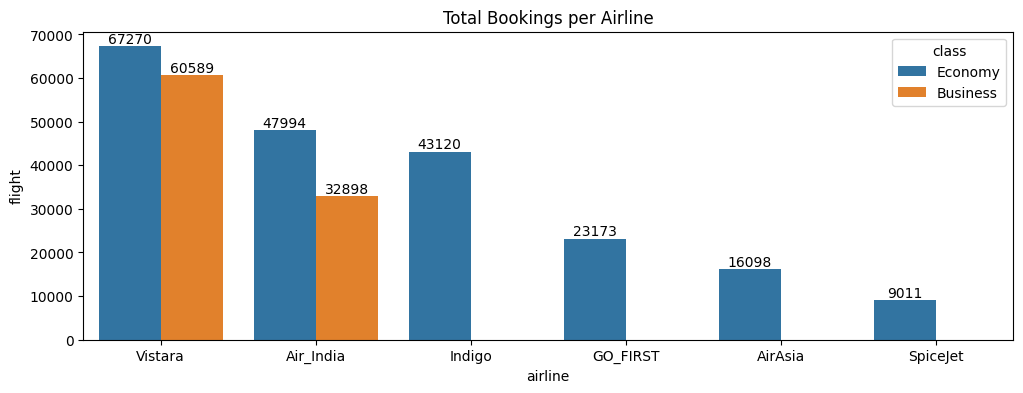

In [7]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(
    data=df.groupby(["airline", "class"])["flight"].count().reset_index().sort_values(by="flight", ascending=False),
    x="airline",
    y="flight",
    hue="class"
)
ax.set_title("Total Bookings per Airline")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

* Vistara is the airline with the most total bookings (127k).
* Spicejet is the airline with the fewest total bookings (9k).
* Only vistara and air india which sell economy and business class.

Text(0.5, 1.0, 'Ticket Class')

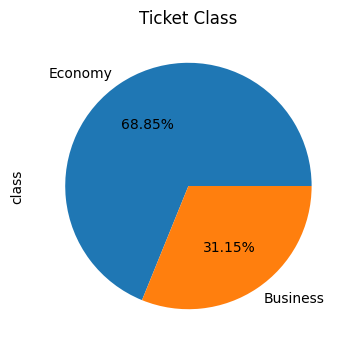

In [8]:
plt.figure(figsize=(4, 4))

df['class'].value_counts().plot(kind="pie", autopct ="%.2f%%")
plt.title("Ticket Class")

* About 69% of bookings are dominated by economy class.

**Does price vary with Airlines?** *(RQ)*

**How does the ticket price vary between Economy and Business class?** *(RQ)*

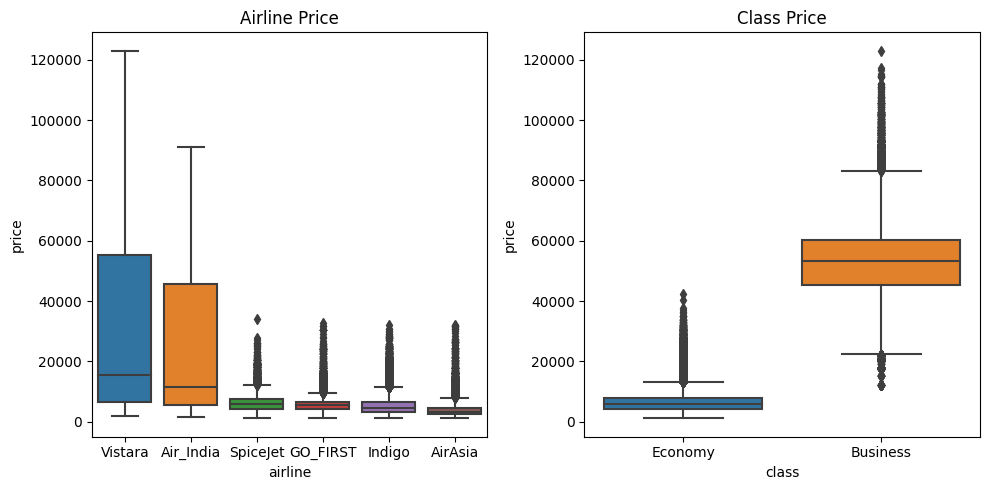

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot 1
sns.boxplot(
    data=df.sort_values(by="price", ascending=False),
    x="airline",
    y="price",
    ax=ax[0]
)
ax[0].set_title("Airline Price")

# Plot 2
sns.boxplot(
    data=df,
    x="class",
    y="price",
    ax=ax[1]
)
ax[1].set_title("Class Price")

plt.tight_layout()

* It can be seen in the left plot that Vista and Air India are the airlines that have more expensive prices than other airlines. This is because only those who sell business class.
* From the right plot, we can see that the price for business class is much more expensive than economy class.

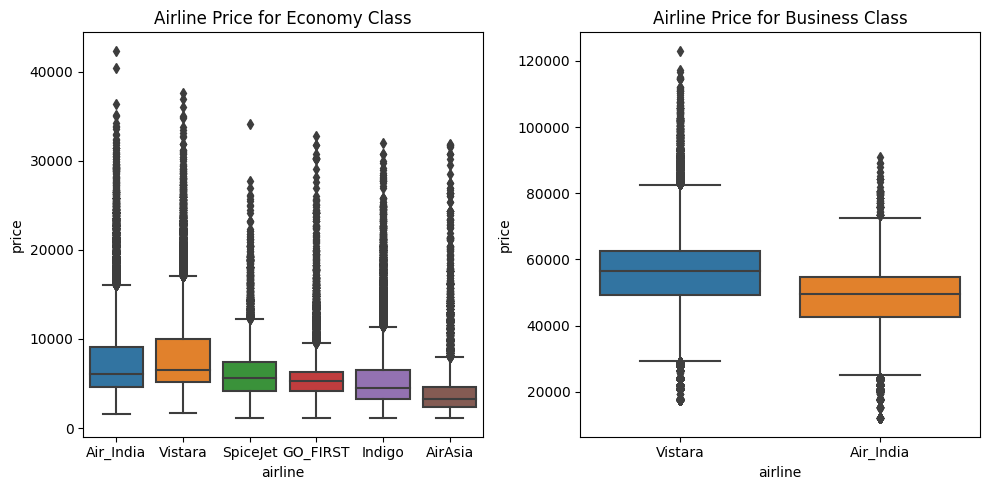

In [10]:
plt.figure(figsize=(10, 5))

# Plot 1
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df[df["class"] == "Economy"].sort_values(by="price", ascending=False),
    x="airline",
    y="price"
)
plt.title("Airline Price for Economy Class")

# Plot 2
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df[df["class"] == "Business"].sort_values(by="price", ascending=False),
    x="airline",
    y="price"
)
plt.title("Airline Price for Business Class")

plt.tight_layout()

* For economy class, Air India and Vistara are more expensive than the others. Meanwhile, AirAsia is the cheapest.
* For business class, Vistara is more expensive than Air India.

**How is the price affected when tickets are bought in just 1 or 2 days before departure?** *(RQ)*

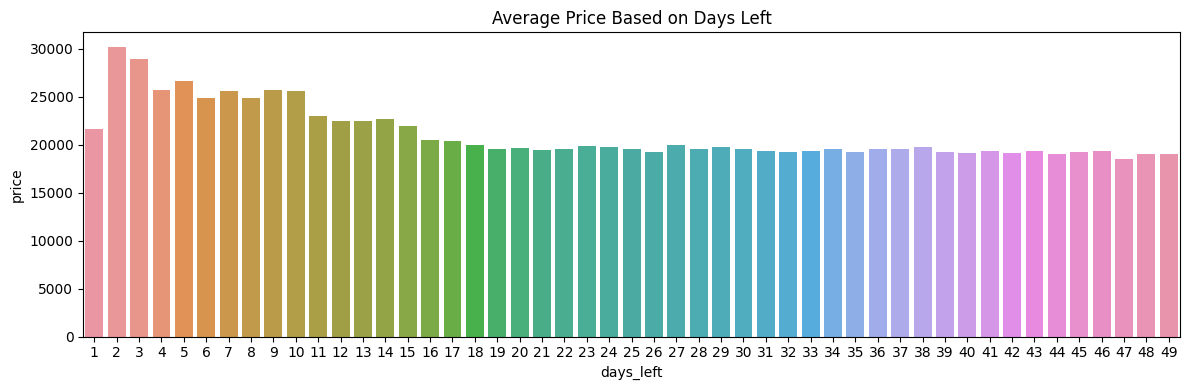

In [11]:
plt.figure(figsize=(12, 4))

sns.barplot(
    data=df.groupby("days_left")["price"].mean().reset_index().sort_values(by="days_left"),
    x="days_left",
    y="price"
)
plt.title("Average Price Based on Days Left")
plt.tight_layout()

* There is a price difference when tickets are purchased only 1 day compared to 2 days before departure. Tickets purchased within 1 day are approximately 8000 cheaper than 2 days before departure.

**Does ticket price change based on the departure time and arrival time?** *(RQ)*

Text(0.5, 1.0, 'Ticket Price Based on Departure Time')

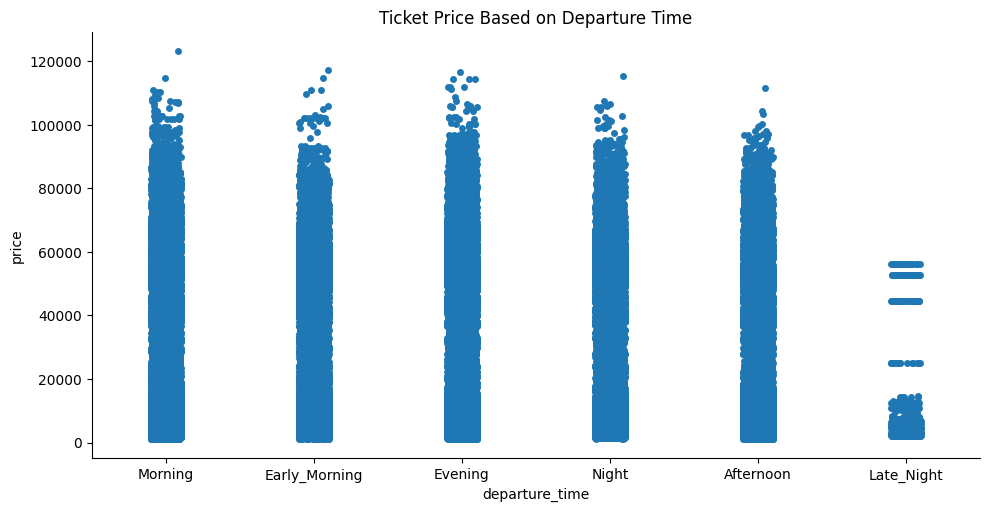

In [12]:
sns.catplot(data=df.sort_values(by="price", ascending=False), x="departure_time", y="price", aspect=2)
plt.title("Ticket Price Based on Departure Time")

* Ticket prices when departure time late evening is more expensive.
* Ticket prices when departure time late night is cheaper.

Text(0.5, 1.0, 'Ticket Price Based on Arrival Time')

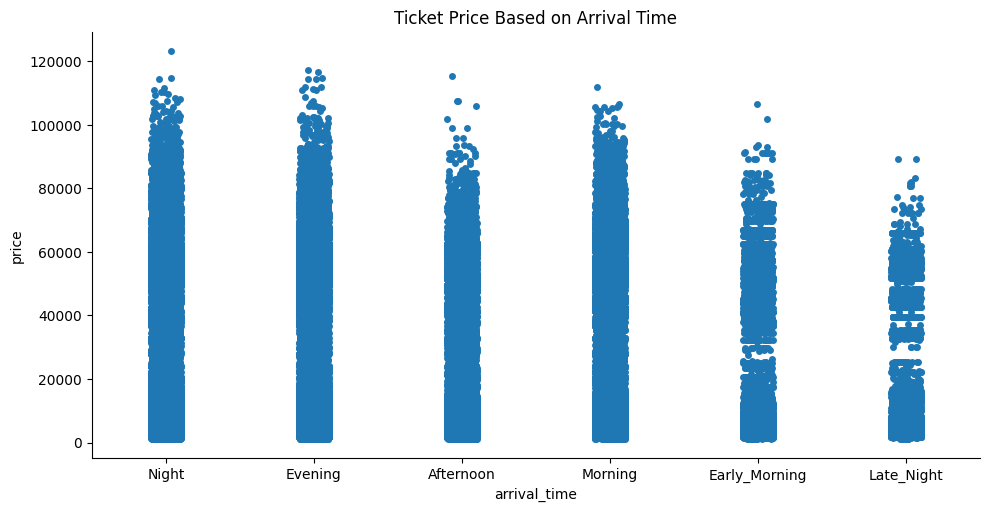

In [13]:
sns.catplot(data=df.sort_values(by="price", ascending=False), x="arrival_time", y="price", aspect=2)
plt.title("Ticket Price Based on Arrival Time")

* Ticket prices when arrival time night and evening is more expensive.
* Ticket prices when arrival time late night is cheaper.

**How the price changes with change in Source and Destination?** *(RQ)*

Text(0.5, 1.0, 'Ticket Price Based on Source City')

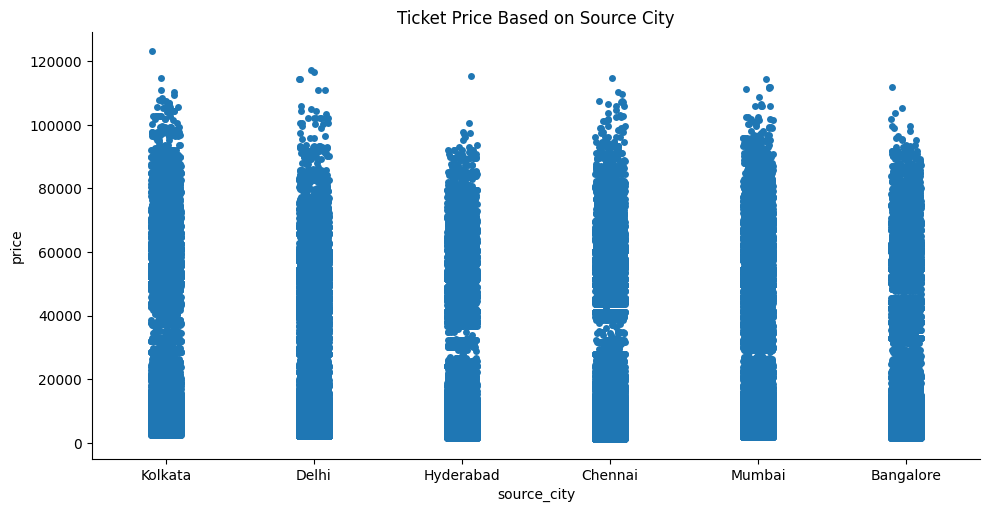

In [14]:
sns.catplot(data=df.sort_values(by="price", ascending=False), x="source_city", y="price", aspect=2)
plt.title("Ticket Price Based on Source City")

* Ticket price when the source city from kolkata is more expensive.
* Ticket price when the source city from Hyderabad is cheaper.

Text(0.5, 1.0, 'Ticket Price Based on Destination City')

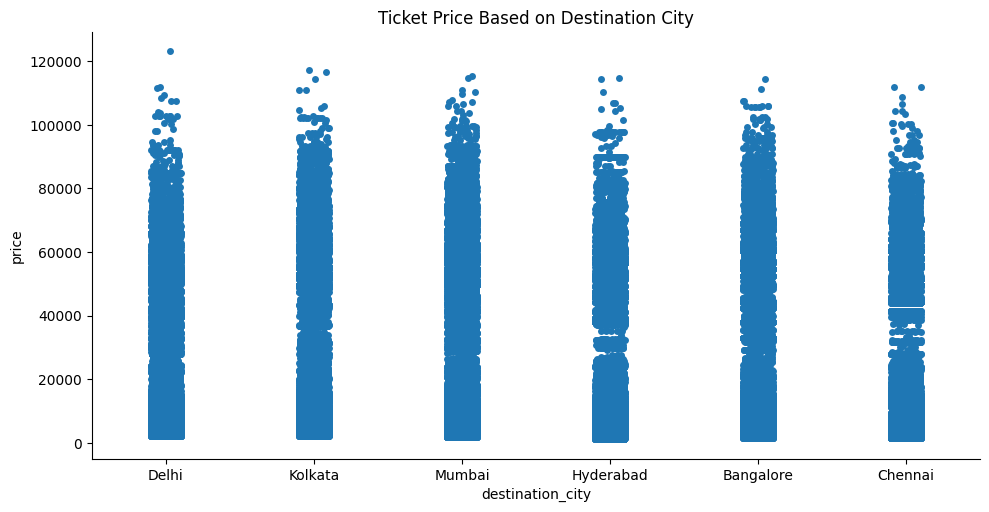

In [15]:
sns.catplot(data=df.sort_values(by="price", ascending=False), x="destination_city", y="price", aspect=2)
plt.title("Ticket Price Based on Destination City")

* Ticket price when the destination city to Kolkata and Delhi is more expensive.
* Ticket price when the destination city to Chennai is cheaper.

**How much the price changes based on the number of stops?**

Text(0.5, 1.0, 'Business Airline Prices Based on Number of Stops')

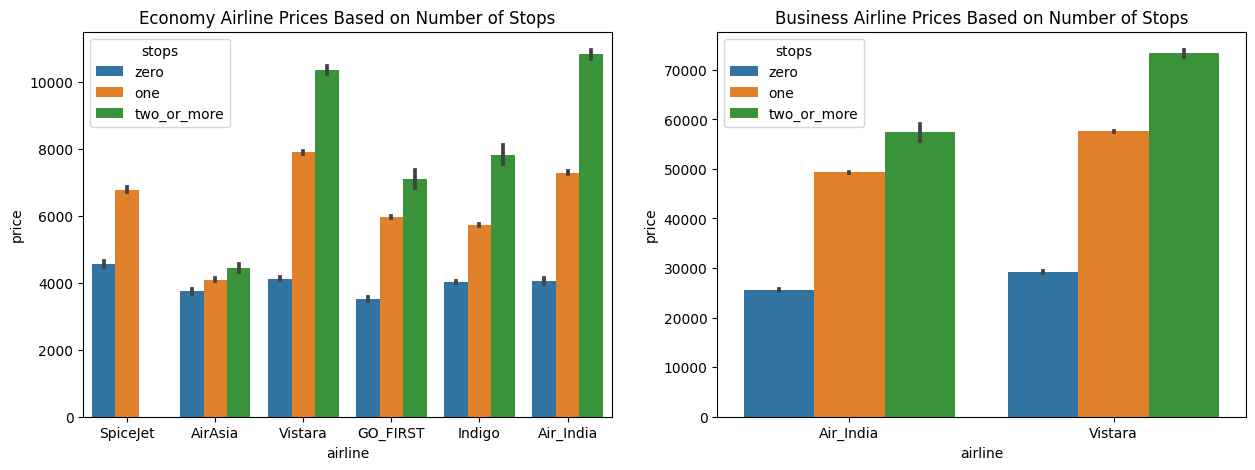

In [16]:
fig, ax = plt.subplots (1, 2, figsize=(15, 5))

# Plot 1
sns.barplot(
    data=df[df["class"] == "Economy"],
    x="airline",
    y="price", 
    hue="stops",
    ax=ax[0]
)
ax[0].set_title("Economy Airline Prices Based on Number of Stops")

# Plot 2
sns.barplot(
    data=df[df["class"] == "Business"],
    x="airline",
    y="price", 
    hue="stops",
    ax=ax[1]
)
ax[1].set_title("Business Airline Prices Based on Number of Stops")

* Whether it's economy class or business class, the more stops the price will be more expensive. But only AirAsia, which increased its price very slightly.

**Are there many outliers in the numerical features?**

duration        AxesSubplot(0.125,0.11;0.227941x0.77)
days_left    AxesSubplot(0.398529,0.11;0.227941x0.77)
price        AxesSubplot(0.672059,0.11;0.227941x0.77)
dtype: object

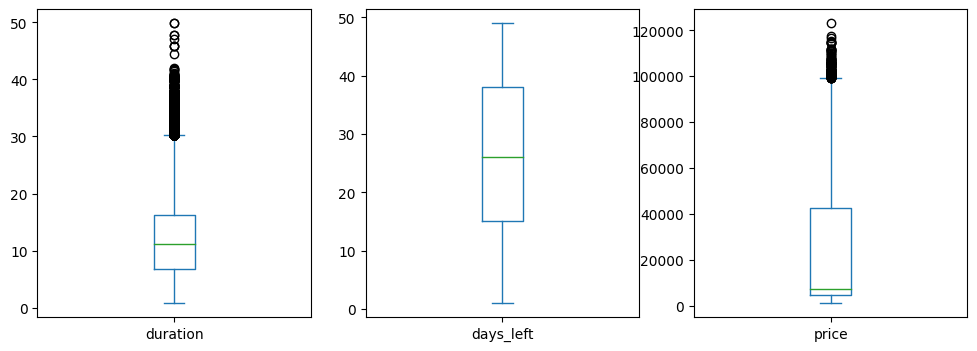

In [17]:
df.plot(kind="box", subplots=True, figsize=(12, 4), layout=(1, 3))

* Yes, there are many outliers found in the duration and price features.

# Data Pre-processing

In [18]:
# Ordinal Encoding
oe = OrdinalEncoder()
df[["departure_time", "stops", "arrival_time", "class"]] = oe.fit_transform(df[["departure_time", "stops", "arrival_time", "class"]])

# One Hot Encoding
for col in df[["airline", "source_city", "destination_city"]].columns:
        df[col] = df[col].apply(lambda x: col + '_' + x)
        
ohe = OneHotEncoder()
data_ohe = ohe.fit_transform(df[["airline", "source_city", "destination_city"]]).toarray()
columns_ohe = np.array(ohe.categories_).ravel()
df_ohe = pd.DataFrame(data=data_ohe, columns=columns_ohe)
df_ohe = df_ohe.drop(["airline_SpiceJet", "source_city_Chennai", "destination_city_Chennai"], axis=1)

# Join to df
df = df.join(df_ohe)
df = df.drop(["airline", "flight", "source_city", "destination_city"], axis=1)

In [19]:
# Split features & output
X = df.drop("price", axis=1)
y = df["price"]

In [20]:
# Features Selection
fs = SelectPercentile(f_regression, percentile=75)
data_fs = fs.fit_transform(X, y)

# DataFrame
X_fs = pd.DataFrame(data=data_fs, columns=fs.get_feature_names_out())
print(f"Total features now: {X_fs.shape[1]}")

# Scores
scores_fs = pd.Series(fs.scores_)
scores_fs.index = X.columns
scores_fs.sort_values(ascending=False)

Total features now: 15


class                         2.192425e+06
airline_Vistara               4.492484e+04
airline_Indigo                2.570861e+04
duration                      1.306315e+04
stops                         1.285024e+04
airline_GO_FIRST              1.176080e+04
airline_AirAsia               9.615792e+03
days_left                     2.559274e+03
airline_Air_India             1.479726e+03
departure_time                1.024320e+03
destination_city_Delhi        8.304336e+02
source_city_Delhi             5.633249e+02
arrival_time                  5.314825e+02
destination_city_Kolkata      1.318679e+02
source_city_Kolkata           7.807979e+01
destination_city_Bangalore    5.926135e+01
source_city_Mumbai            5.235753e+01
source_city_Hyderabad         4.939975e+01
source_city_Bangalore         4.110462e+01
destination_city_Mumbai       3.330651e+01
destination_city_Hyderabad    2.064075e+01
dtype: float64

* The higher the score, it means that the feature has a large influence on the target.
* Class, airline_Vistara & airline_Indigo are the top 3 features that have the most influence on price.

In [21]:
# Train (60%), Validation (20%), Test (20%)

# Validation set
X_train, X_val, y_train, y_val = train_test_split(X_fs, y, test_size=0.4, random_state=0)

# Test set
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=0)

print(f"Train size = {X_train.shape[0]}")
print(f"Validation size = {X_val.shape[0]}")
print(f"Test size = {X_test.shape[0]}")

Train size = 180091
Validation size = 60031
Test size = 60031


# Models

## Linear Regression 

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_val)

print("Train Set")
print(f"MAE: {mean_absolute_error(y_train, lr.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, lr.predict(X_train), squared=False)}")
print(f"R2: {r2_score(y_train, lr.predict(X_train))}")
print("")
print("Validation Set")
print(f"MAE: {mean_absolute_error(y_val, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_lr, squared=False)}")
print(f"R2: {r2_score(y_val, y_pred_lr)}")

Train Set
MAE: 4630.37279028848
MSE: 47758926.473249316
RMSE: 6910.783347294959
R2: 0.9073117046079866

Validation Set
MAE: 4615.781939216392
MSE: 47270747.264289774
RMSE: 6875.372518219633
R2: 0.907891085712102


* The metric results between the train set and the validation set are not that far apart which means this model is not overfit. However, the results obtained were not satisfactory.

## Decision Tree Regressor 

In [23]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_val)

print("Train Set")
print(f"MAE: {mean_absolute_error(y_train, dtr.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train, dtr.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, dtr.predict(X_train), squared=False)}")
print(f"R2: {r2_score(y_train, dtr.predict(X_train))}")
print("")
print("Validation Set")
print(f"MAE: {mean_absolute_error(y_val, y_pred_dtr)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_dtr)}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_dtr, squared=False)}")
print(f"R2: {r2_score(y_val, y_pred_dtr)}")

Train Set
MAE: 281.54451212627697
MSE: 1868537.9021625174
RMSE: 1366.9447326657057
R2: 0.9963736288519002

Validation Set
MAE: 1781.9670478586063
MSE: 19388505.134081792
RMSE: 4403.238028324359
R2: 0.9622207335208615


* The metric results obtained are much better than the linear regression model, but between the train set and the validation set there is a slight difference, which means the model is slightly overfit. Therefore it is necessary to do hyperparameter tuning.

### Hyperparameter Tuning 

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [24]:
dtr_param_grid = {
    "max_depth": [14, 15],
    "min_samples_split": [2, 6, 10, 14],
    "min_samples_leaf": [1, 5, 9, 13]
}

dtr_tune = GridSearchCV(
    estimator=dtr,
    param_grid=dtr_param_grid,
    scoring="neg_root_mean_squared_error",
    cv=2,
    verbose=3,
    return_train_score=True
).fit(X_train, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV 1/2] END max_depth=14, min_samples_leaf=1, min_samples_split=2;, score=(train=-4050.699, test=-4661.591) total time=   0.3s
[CV 2/2] END max_depth=14, min_samples_leaf=1, min_samples_split=2;, score=(train=-4114.675, test=-4540.639) total time=   0.3s
[CV 1/2] END max_depth=14, min_samples_leaf=1, min_samples_split=6;, score=(train=-4099.626, test=-4604.121) total time=   0.3s
[CV 2/2] END max_depth=14, min_samples_leaf=1, min_samples_split=6;, score=(train=-4160.684, test=-4500.458) total time=   0.3s
[CV 1/2] END max_depth=14, min_samples_leaf=1, min_samples_split=10;, score=(train=-4139.831, test=-4582.128) total time=   0.3s
[CV 2/2] END max_depth=14, min_samples_leaf=1, min_samples_split=10;, score=(train=-4195.380, test=-4482.733) total time=   0.3s
[CV 1/2] END max_depth=14, min_samples_leaf=1, min_samples_split=14;, score=(train=-4166.072, test=-4572.009) total time=   0.3s
[CV 2/2] END max_depth=14, min_samples_l

In [25]:
dtr_tune.best_params_

{'max_depth': 15, 'min_samples_leaf': 9, 'min_samples_split': 2}

In [26]:
y_pred_dtr_tune = dtr_tune.predict(X_val)

print("Train Set")
print(f"MAE: {mean_absolute_error(y_train, dtr_tune.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train, dtr_tune.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, dtr_tune.predict(X_train), squared=False)}")
print(f"R2: {r2_score(y_train, dtr_tune.predict(X_train))}")
print("")
print("Validation Set")
print(f"MAE: {mean_absolute_error(y_val, y_pred_dtr_tune)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_dtr_tune)}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_dtr_tune, squared=False)}")
print(f"R2: {r2_score(y_val, y_pred_dtr_tune)}")

Train Set
MAE: 2192.59349834733
MSE: 16615467.573272126
RMSE: 4076.2074987998494
R2: 0.9677534760466091

Validation Set
MAE: 2294.5859071635405
MSE: 18024266.63316945
RMSE: 4245.499574039485
R2: 0.9648790060132812


* The results of the validation set metric after hyperparameter tuning were slightly increased from before. The metric results between the train set and the validation set are also not much different from before, i could say this model is not overfit and good.

## Random Forest Regressor 

In [27]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_val)

print("Train Set")
print(f"MAE: {mean_absolute_error(y_train, rfr.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train, rfr.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, rfr.predict(X_train), squared=False)}")
print(f"R2: {r2_score(y_train, rfr.predict(X_train))}")
print("")
print("Validation Set")
print(f"MAE: {mean_absolute_error(y_val, y_pred_rfr)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_rfr)}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_rfr, squared=False)}")
print(f"R2: {r2_score(y_val, y_pred_rfr)}")

Train Set
MAE: 711.2965558039542
MSE: 3035357.774074083
RMSE: 1742.2278192228716
R2: 0.9941091193048193

Validation Set
MAE: 1599.9483633862687
MSE: 12831855.98591779
RMSE: 3582.1580068330027
R2: 0.9749966228256681


* The results of the metrics between the train set and the validation set are a little far away, which means the model is a little overfit. Therefore it is necessary to do hyperparameter tuning.

### Hyperparameter Tuning 

In [28]:
rfr_param_grid = {
    "n_estimators": [100, 125],
    "min_samples_split": [2, 6, 10],
    "min_samples_leaf": [1, 5, 9],
    "max_features": [1, 10]
}

rfr_tune = GridSearchCV(
    estimator=rfr,
    param_grid=rfr_param_grid,
    scoring="neg_root_mean_squared_error",
    cv=2,
    verbose=3,
    return_train_score=True
).fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1712.481, test=-4006.739) total time=  12.9s
[CV 2/2] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-1729.361, test=-3972.770) total time=  12.7s
[CV 1/2] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=-1706.817, test=-4007.630) total time=  16.0s
[CV 2/2] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=-1721.239, test=-3972.167) total time=  15.9s
[CV 1/2] END max_features=1, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=-2646.388, test=-3925.832) total time=   9.5s
[CV 2/2] END max_features=1, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=(train=-2673.713, test=-3876.700) total time=   9.5s
[CV 1/2] END max_features=1, min_samples_leaf=1, mi

In [29]:
rfr_tune.best_params_

{'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 125}

In [30]:
y_pred_rfr_tune = rfr_tune.predict(X_val)

print("Train Set")
print(f"MAE: {mean_absolute_error(y_train, rfr_tune.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train, rfr_tune.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, rfr_tune.predict(X_train), squared=False)}")
print(f"R2: {r2_score(y_train, rfr_tune.predict(X_train))}")
print("")
print("Validation Set")
print(f"MAE: {mean_absolute_error(y_val, y_pred_rfr_tune)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_rfr_tune)}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_rfr_tune, squared=False)}")
print(f"R2: {r2_score(y_val, y_pred_rfr_tune)}")

Train Set
MAE: 1215.4586332786994
MSE: 6301344.383346135
RMSE: 2510.2478728894753
R2: 0.9877706449306909

Validation Set
MAE: 1627.636312595464
MSE: 11140672.03546071
RMSE: 3337.7645266646223
R2: 0.9782919614135436


* The results of the validation set metric after hyperparameter tuning were slightly increased. The metric results between the train set and the validation set are also not much different from before, i could say this model is not overfit and and better than decision tree regressor and linear regression models.

## Neural Networks 

In [31]:
nn = Sequential(
    [
        Dense(units=100, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=1, activation="linear")
    ]
)

nn.compile(
    loss=BinaryCrossentropy,
    optimizer=Adam(learning_rate=0.005)
)

history = nn.fit(X_train, y_train, epochs=16, batch_size=32, validation_

Epoch 1/150
1801/1801 [==============================] - 7s 3ms/step - loss: 95257880.0000 - val_loss: 31048532.0000
Epoch 2/150
1801/1801 [==============================] - 5s 3ms/step - loss: 30595094.0000 - val_loss: 27806882.0000
Epoch 3/150
1801/1801 [==============================] - 5s 3ms/step - loss: 27847172.0000 - val_loss: 25747980.0000
Epoch 4/150
1801/1801 [==============================] - 5s 3ms/step - loss: 26741230.0000 - val_loss: 25265476.0000
Epoch 5/150
1801/1801 [==============================] - 5s 3ms/step - loss: 26203504.0000 - val_loss: 25923702.0000
Epoch 6/150
1801/1801 [==============================] - 5s 3ms/step - loss: 25516756.0000 - val_loss: 26640148.0000
Epoch 7/150
1801/1801 [==============================] - 5s 3ms/step - loss: 25288818.0000 - val_loss: 24620622.0000
Epoch 8/150
1801/1801 [==============================] - 5s 3ms/step - loss: 25049438.0000 - val_loss: 27456264.0000
Epoch 9/150
1801/1801 [==============================] - 5s 3ms/

In [32]:
y_pred_nn = nn.predict(X_val)

print("Train Set")
print(f"MAE: {mean_absolute_error(y_train, nn.predict(X_train))}")
print(f"MSE: {mean_squared_error(y_train, nn.predict(X_train))}")
print(f"RMSE: {mean_squared_error(y_train, nn.predict(X_train), squared=False)}")
print(f"R2: {r2_score(y_train, nn.predict(X_train))}")
print("")
print("Validation Set")
print(f"MAE: {mean_absolute_error(y_val, y_pred_nn)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_nn)}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_nn, squared=False)}")
print(f"R2: {r2_score(y_val, y_pred_nn)}")

1876/1876 [==============================] - 3s 1ms/step
Train Set
5628/5628 [==============================] - 8s 1ms/step
MAE: 2456.423211668261
5628/5628 [==============================] - 8s 1ms/step
MSE: 18800009.456776474
5628/5628 [==============================] - 8s 1ms/step
RMSE: 4335.897768257051
5628/5628 [==============================] - 8s 1ms/step
R2: 0.9635138191207382

Validation Set
MAE: 2517.649164460016
MSE: 19695541.51090836
RMSE: 4437.9659204311565
R2: 0.9616224610383415


* The metric results between the train set and the validation set are not that far apart which means this model is not overfit. But the results are still less good than the random forest regressor.
* Based on the results of the metrics, the best model is the random forest regressor. Therefore, the final evaluation with the test set will be carried out with a random forest regressor.

## Final Evaluation using Test Set

In [33]:
y_pred = rfr_tune.predict(X_test)

print("Test Set")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {r2_score(y_test, y_pred)}")

Test Set
MAE: 1630.9252786049599
MSE: 11092467.079197891
RMSE: 3330.535554411316
R2: 0.978541913289185


* The results between test set and validation set isn't differ too much. Hence we can say that this model not overfit and ready to use.